In [3]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [4]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
import sklearn.cross_validation as cv
import sklearn.grid_search as gs
import sklearn.svm as svm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
X = np.random.randn(200, 2)
y = X[:, 0] + X[:, 1] > 1

In [7]:
# We train the classifier.
est = svm.LinearSVC()
est.fit(X, y);


We define a function that displays the boundaries and decision function of a trained classifier.

In [8]:
# We generate a grid in the square [-3,3 ]^2.
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
# This function takes a SVM estimator as input.
def plot_decision_function(est):
    # We evaluate the decision function on the grid.
    Z = est.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap = plt.cm.Blues
    # We display the decision function on the grid.
    plt.figure(figsize=(5,5));
    plt.imshow(Z,
                extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                aspect='auto', origin='lower', cmap=cmap);
    # We display the boundaries.
    plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                colors='k');
    # We display the points with their true labels.
    plt.scatter(X[:, 0], X[:, 1], s=30, c=.5+.5*y, lw=1, 
                cmap=cmap, vmin=0, vmax=1);
    plt.axhline(0, color='k', ls='--');
    plt.axvline(0, color='k', ls='--');
    plt.xticks(());
    plt.yticks(());
    plt.axis([-3, 3, -3, 3]);

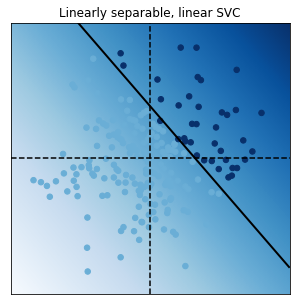

In [9]:
plot_decision_function(est);
plt.title("Linearly separable, linear SVC");


The linear SVC tried to separate the points with a line and it did a pretty good job.

We now modify the labels with a XOR function. A point's label is 1 if the coordinates have different signs. This classification is not linearly separable. Therefore, a linear SVC fails completely.

Score: 0.5


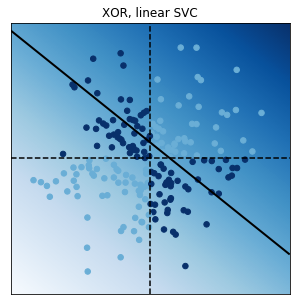

In [10]:
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
# We train the classifier.
est = gs.GridSearchCV(svm.LinearSVC(), 
                      {'C': np.logspace(-3., 3., 10)});
est.fit(X, y);
print("Score: {0:.1f}".format(
      cv.cross_val_score(est, X, y).mean()))
# Plot the decision function.
plot_decision_function(est);
plt.title("XOR, linear SVC");

Fortunately, it is possible to use non-linear SVCs by using non-linear kernels. Kernels specify a non-linear transformation of the points into a higher-dimensional space. Transformed points in this space are assumed to be more linearly separable, although they are not necessarily in the original space. By default, the SVC classifier in scikit-learn uses the Radial Basis Function (RBF) kernel.

Score: 0.950


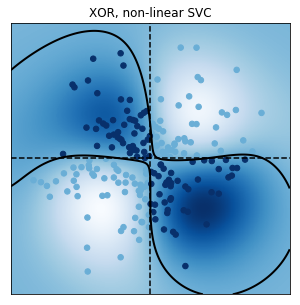

In [11]:
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
est = gs.GridSearchCV(svm.SVC(), 
                      {'C': np.logspace(-3., 3., 10),
                    'gamma': np.logspace(-3., 3., 10)});
est.fit(X, y);
print("Score: {0:.3f}".format(
      cv.cross_val_score(est, X, y).mean()))
plot_decision_function(est.best_estimator_);
plt.title("XOR, non-linear SVC");